In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [83]:
# Reading the file
presidents_file = pd.read_csv('us_presidents 2.csv')
presidents_file

,Unnamed: 0,S.No.,start,end,president,prior,party,vice
0,0,1,"April 30, 1789","March 4, 1797",George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams
1,1,2,"March 4, 1797","March 4, 1801",John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson
2,2,3,"March 4, 1801","March 4, 1809",Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr
3,3,4,"March 4, 1809","March 4, 1817",James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton
4,4,5,"March 4, 1817","March 4, 1825",James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins
5,5,6,"March 4, 1825","March 4, 1829",John Quincy Adams,8th United States Secretary of State (1817–...,Democratic- Republican,John C. Calhoun
6,6,7,"March 4, 1829","March 4, 1837",Andrew Jackson,U.S. Senator ( Class 2 ) from Tennessee ...,Democratic,John C. Calhoun
7,7,8,"March 4, 1837","March 4, 1841",Martin Van Buren,8th Vice President of the United States,Democratic,Richard Mentor Johnson
8,8,9,"March 4, 1841","April 4, 1841",William Henry Harrison,United States Minister to Colombia (1828–1829),Whig,John Tyler
9,9,10,"April 4, 1841","March 4, 1845",John Tyler,10th Vice President of the United States,"Whig April 4, 1841 – September 13, 1841",Office vacant


In [105]:
# Replace '--' with NaN in the 'end' column for consistency
presidents_file['end'].replace('--', np.nan, inplace=True)

/tmp/ipykernel_8242/2599100081.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  presidents_file['end'].replace('--', np.nan, inplace=True)


In [85]:
# Convert 'start' and 'end' columns to datetime
presidents_file['start'] = pd.to_datetime(presidents_file['start'], errors='coerce')
presidents_file['end'] = pd.to_datetime(presidents_file['end'], errors='coerce')
      

In [86]:
# Calculate the length of the term (difference in days, converted to years)
presidents_file['Ruled for (Years)'] = ((presidents_file['end'] - presidents_file['start']).dt.days / 365.25).fillna(0)

In [93]:
# Clean the party column
presidents_file['party'] = presidents_file['party'].str.extract(r'^([A-Za-z\-]+)', expand=False).str.strip()
presidents_file['party'] = presidents_file['party'].fillna('Unknown')


In [94]:
# Create a DataFrame with relevant columns
presidents_df = presidents_file[['president', 'start', 'end', 'Ruled for (Years)', 'party']]
presidents_df.columns = ['President', 'Start', 'End', 'Ruled for (Years)', 'Party']
presidents_df

,President,Start,End,Ruled for (Years),Party
0,George Washington,1789-04-30,1797-03-04,7.843943,Nonpartisan
1,John Adams,1797-03-04,1801-03-04,3.997262,Federalist
2,Thomas Jefferson,1801-03-04,1809-03-04,8.000000,Democratic-Republican
3,James Madison,1809-03-04,1817-03-04,8.000000,Democratic-Republican
4,James Monroe,1817-03-04,1825-03-04,8.000000,Democratic-Republican
5,John Quincy Adams,1825-03-04,1829-03-04,4.000000,Democratic-Republican
6,Andrew Jackson,1829-03-04,1837-03-04,8.000000,Democratic
7,Martin Van Buren,1837-03-04,1841-03-04,4.000000,Democratic
8,William Henry Harrison,1841-03-04,1841-04-04,0.084873,Whig
9,John Tyler,1841-04-04,1845-03-04,3.915127,Whig


In [99]:
# Calculate the average term length in years
average_term = presidents_df['Ruled for (Years)'].mean()
print(f"The average term length is approximately {average_term:.2f} years.")

The average term length is approximately 4.79 years.


In [104]:
# President with the longest term
longest_term = presidents_df.loc[presidents_df['Ruled for (Years)'].idxmax()]
print(f"The president with the longest term is {longest_term['President']} with {longest_term['Ruled for (Years)']} years.")


The president with the longest term is Thomas Jefferson with 8.0 years.


In [103]:
# Count of presidents by party
party_counts = presidents_df['Party'].value_counts()
print("Number of presidents by party:")
print(party_counts)

Number of presidents by party:
Party
Republican               19
Democratic               15
Democratic-Republican     4
Whig                      4
Nonpartisan               1
Federalist                1
National                  1
Name: count, dtype: int64


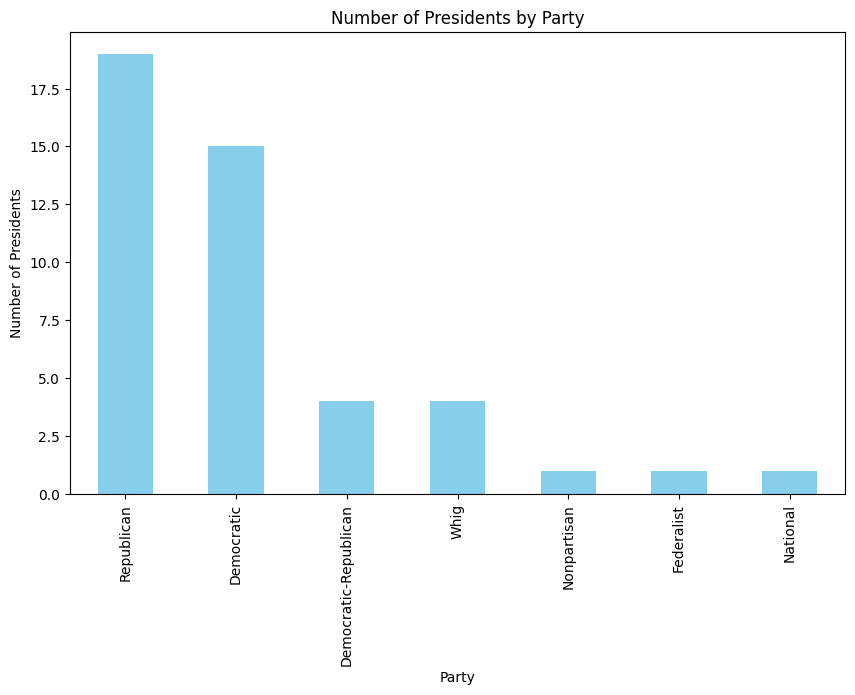

In [107]:
# Plotting the number of presidents by party
party_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Presidents by Party')
plt.xlabel('Party')
plt.ylabel('Number of Presidents')
plt.show()
